In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfJan = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_January_2019.csv')
dfFeb = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_February_2019.csv')
dfMar = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_March_2019.csv')
dfApr = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_April_2019.csv')
dfMay = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_May_2019.csv')
dfJun = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_June_2019.csv')
dfJul = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_July_2019.csv')
dfAug = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_August_2019.csv')
dfSep = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_September_2019.csv')
dfOct = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_October_2019.csv')
dfNov = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_November_2019.csv')
dfDec = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/Sales_Data/Sales_December_2019.csv')

In [4]:
dfConcat = pd.concat([dfJan,dfFeb,dfMar,dfApr,dfMay,dfJun,dfJul,dfAug,dfSep,dfOct,dfNov,dfDec])
dfConcat.set_index('Order ID', inplace = True)

In [5]:
dfConcat.dropna(axis = 'index', inplace = True)
dfConcat.columns = dfConcat.columns.str.replace(' ', '_')

In [6]:
dfDateTime = dfConcat['Order_Date'].str.split(expand = True) 
dfDateTime.columns = ['Date','Time']

In [7]:
dfConcat = pd.concat([dfDateTime,dfConcat], axis = 'columns')

In [8]:
dfConcat['Date'].replace({'Order' :np.nan},inplace = True)
dfConcat['Quantity_Ordered'].replace({'Quantity Ordered':np.nan}, inplace = True)
dfConcat['Product'].replace({'Product':np.nan},inplace= True)
dfConcat.dropna(inplace=True)

In [9]:
dfConcat['Date'] = pd.to_datetime(dfConcat['Date'])
dfConcat['Month'] = dfConcat['Date'].dt.strftime('%B')

/var/folders/h7/4g5s0n950bbc47bx6zclk9hm0000gn/T/ipykernel_13993/194320742.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfConcat['Date'] = pd.to_datetime(dfConcat['Date'])


In [10]:
dfConcat['Quantity_Ordered'] = dfConcat['Quantity_Ordered'].astype('int')

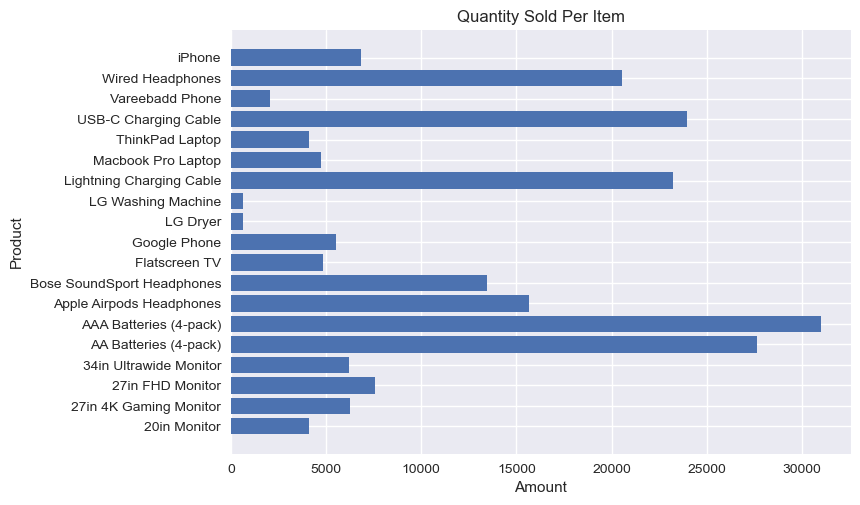

In [23]:
product_grp = dfConcat.groupby('Product')
Tquantity_ordered = product_grp['Quantity_Ordered'].sum()
Tquantity_ordered


plt.barh(Tquantity_ordered.index,Tquantity_ordered)
plt.style.use('seaborn-v0_8')
plt.title('Quantity Sold Per Item')
plt.xlabel('Amount')
plt.ylabel('Product')
plt.show() 

TOTAL QUANTITY OF EACH PRODUCT SOLD

In [12]:
dfConcat['Price_Each'] = dfConcat['Price_Each'].astype('float')
dfConcat['Price_Each'] = dfConcat['Price_Each'].astype('int')

In [13]:
dfConcat['Sales'] = dfConcat['Quantity_Ordered'] * dfConcat['Price_Each']

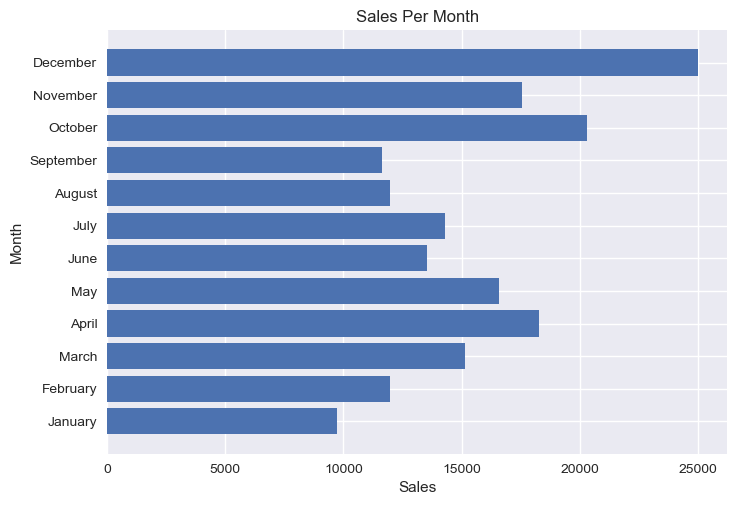

In [35]:
month_grp = dfConcat.groupby('Month', sort=True)
salesbymonth = month_grp['Sales'].count().sort_values(ascending= False)

cats = ['January','February','March','April','May','June','July','August','September','October','November','December']
salesbymonth.index = pd.CategoricalIndex(salesbymonth.index, categories = cats, ordered = True)

salesbymonth = salesbymonth.sort_index()
plt.barh(salesbymonth.index,salesbymonth)
plt.style.use('seaborn-v0_8')
plt.title('Sales Per Month')
plt.xlabel('Sales')
plt.ylabel('Month')
plt.show() 

TOTAL SALES PER MONTH: UNSORTED

In [76]:
dfConcat['Purchase_Address'] = dfConcat['Purchase_Address'].astype('string')

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

dfConcat['City_Order'] = dfConcat['Purchase_Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

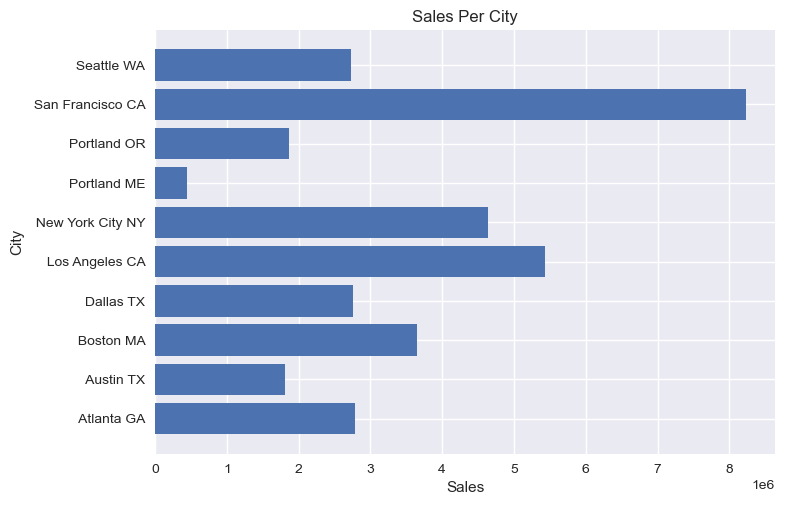

In [37]:
city_grp = dfConcat.groupby('City_Order')
citysales = city_grp['Sales'].sum()

plt.barh(citysales.index,citysales)
plt.style.use('seaborn-v0_8')
plt.title('Sales Per City')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show() 

TOTAL SALES PER CITY

In [17]:
dfConcat['Order_Date'] = pd.to_datetime(dfConcat['Order_Date'])

/var/folders/h7/4g5s0n950bbc47bx6zclk9hm0000gn/T/ipykernel_13993/2003643845.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfConcat['Order_Date'] = pd.to_datetime(dfConcat['Order_Date'])


In [18]:
dfConcat['Hour'] = dfConcat['Order_Date'].dt.hour
dfConcat['Minute'] = dfConcat['Order_Date'].dt.minute

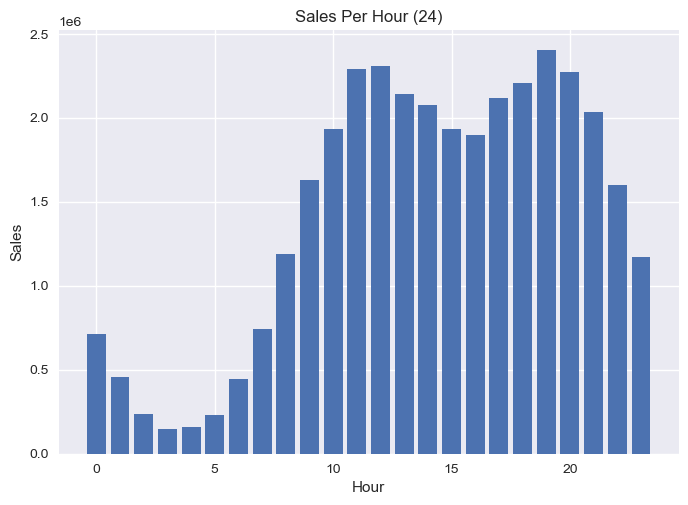

In [38]:
hour_grp = dfConcat.groupby('Hour')
saleshour = hour_grp['Sales'].sum()

plt.bar(saleshour.index,saleshour)
plt.style.use('seaborn-v0_8')
plt.title('Sales Per Hour (24)')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show() 


BEST HOUR(S) TO SHOW ADVERTISEMENT

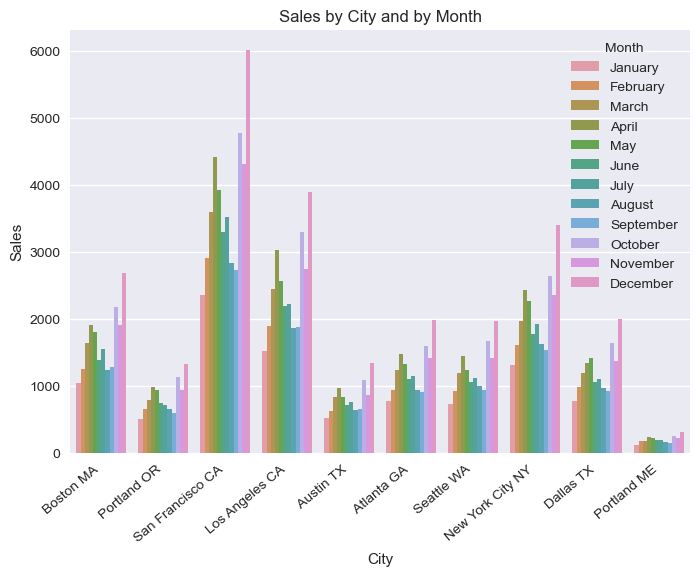

In [75]:
fig = sns.countplot(data = dfConcat, x = 'City_Order', hue = 'Month', saturation = .6)
fig.set_title('Sales by City and by Month')
fig.set_xlabel('City')
fig.set_ylabel('Sales')

fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
plt.show()